## Ford GoBike System Data Analysis
######  Prepared by Mina Atef

### Introduction:

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. 

Ford GoBike consists of a fleet of specially designed and locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.
 
### Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Reading the dataset in a pandas dataframe object and show the first few rows 
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Check the dataframe rows and columns 
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# checking varaiables statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# checking for null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# members gender unique values
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [8]:
# Users types
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
# start station unique values 
df['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [10]:
# check for duplicates
df.duplicated().sum()

0

### Data Cleaning steps:

In order to start working with our data we need to clean the dataset following the below steps

    - Drop unwanted columns['start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id']
    - Change start_time and end_time to datetime format
    - Drop missing values
    - Drop abnormal member_birth_year values
    - Change duration_sec from seconds to Minutes
    - Change member_birth_year to member_age that contains the age values instead of birth year

In [11]:
# drop unwanted columns 
df = df.drop(columns = ['start_station_id', 'end_station_id','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id'], axis = 1)

In [12]:
df.shape

(183412, 9)

In [13]:
# Change start_time and end_time to datetime format
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [14]:
# Extract day of the week, hours information from the start_time
df['start_dayofweek']= df['start_time'].dt.strftime('%a')
df['start_hour']= df['start_time'].dt.hour

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_name       183215 non-null  object        
 4   end_station_name         183215 non-null  object        
 5   user_type                183412 non-null  object        
 6   member_birth_year        175147 non-null  float64       
 7   member_gender            175147 non-null  object        
 8   bike_share_for_all_trip  183412 non-null  object        
 9   start_dayofweek          183412 non-null  object        
 10  start_hour               183412 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 15.4+ MB


In [16]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dayofweek,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,Thu,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN,No,Thu,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,Thu,23


In [17]:
df['start_dayofweek'].value_counts()

Thu    35197
Tue    31813
Wed    29641
Fri    28981
Mon    26852
Sun    15523
Sat    15405
Name: start_dayofweek, dtype: int64

In [18]:
# Convert the start_dayofweek to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['start_dayofweek'] = df['start_dayofweek'].astype(ordered_weekdays)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_name       183215 non-null  object        
 4   end_station_name         183215 non-null  object        
 5   user_type                183412 non-null  object        
 6   member_birth_year        175147 non-null  float64       
 7   member_gender            175147 non-null  object        
 8   bike_share_for_all_trip  183412 non-null  object        
 9   start_dayofweek          183412 non-null  category      
 10  start_hour               183412 non-null  int64         
dtypes: category(1), datetime64[ns](2), float64(1), int64(2), object(5)
memory usag

In [20]:
# drop null values 
df = df.dropna()
df.shape

(174952, 11)

In [21]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_dayofweek            0
start_hour                 0
dtype: int64

In [22]:
# check member birth year values
df['member_birth_year'].value_counts()

1988.0    10214
1993.0     9323
1989.0     8967
1990.0     8640
1991.0     8484
          ...  
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [23]:
# drop wrong birth year value 
df = df.drop(index = df[df['member_birth_year']== 1878].index, axis =0)
df.shape

(174951, 11)

In [24]:
# change duration from sec to min
df['duration_min'] = df['duration_sec']/60
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dayofweek,start_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,Thu,17,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,Thu,12,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,Thu,17,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,Thu,23,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No,Thu,23,29.883333


In [25]:
# create member age variable
df['member_age'] = 2021 - df['member_birth_year']
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dayofweek,start_hour,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,Thu,17,869.750000,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,Thu,12,1030.900000,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,Thu,17,608.166667,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,Thu,23,26.416667,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No,Thu,23,29.883333,62.0


In [26]:
# drop duration_sec and member birth year columns
drop_cols = ['duration_sec', 'member_birth_year']
df = df.drop(columns = drop_cols, axis = 1)
df.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,start_dayofweek,start_hour,duration_min,member_age
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,Thu,17,869.750000,37.0
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,Thu,12,1030.900000,49.0
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,Thu,17,608.166667,32.0
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,Thu,23,26.416667,47.0
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,Thu,23,29.883333,62.0


### What is the structure of your dataset?

 The dataset contained features about:

    duration_sec: Trip Duration (seconds)
    start_time>: Start Time and Date
    end_time: End Time and Date
    start_station_id: Start Station ID
    start_station_name: Start Station Name
    start_station_latitude: Start Station Latitude
    start_station_longitude: Start Station Longitude
    end_station_id: End Station ID
    end_station_name: End Station Name
    end_station_latitude: End Station Latitude
    end_station_longitude: End Station Longitude
    bike_id: Bike ID
    user_type: User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
    member_birth_year: Member Year of Birth
    member_gender: Member Gender
    bike_share_for_all_trip: Boolean to track members who are enrolled in the "Bike Share for All" program for low-income residents

### What is/are the main feature(s) of interest in your dataset?

    Gender
    Users type
    Age
    Location
    Duration


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

        start_time - using weekdays, hours for further investigation.
        member_birth_year - we may extract member age and investigate the relationship between member age and bike durations.
        member_gender
        user_type

## Univariate Exploration

In [27]:
# member age exploration
df['member_age'].describe()

count    174951.000000
mean         36.196255
std          10.115538
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         121.000000
Name: member_age, dtype: float64

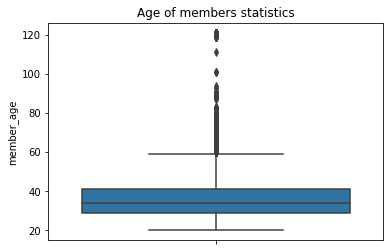

In [28]:
sns.boxplot(data = df, y = 'member_age')
plt.title('Age of members statistics');

We can see from the plot above that that there are many outliers in the age column and the maximum value is 121 years which is not usual and these outliers affects our analysis so we have to handle them. 

We will calculate the IQR to decide the maximum value:

- IQR = Q3 - Q1 = 39.0 - 27.0 = 12.0
- Upper Bound = (1.5 * IQR) + Q3 = 18.0 + 39.0 = 57.0



In [29]:
# We will subset the data to extract all the rows where age value is less than 60
df = df[df['member_age'] <= 60]

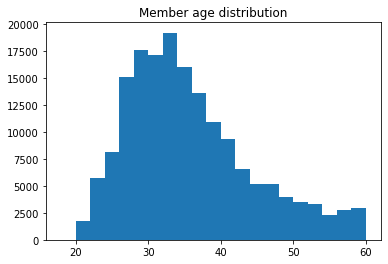

In [30]:
# member age distribution

bins = np.arange(18, df['member_age'].max()+2, 2)
plt.hist(data= df, x = 'member_age', bins = bins)
plt.title("Member age distribution");

From the histogram above we can say that people who are around 30 years old are the most users of the service.

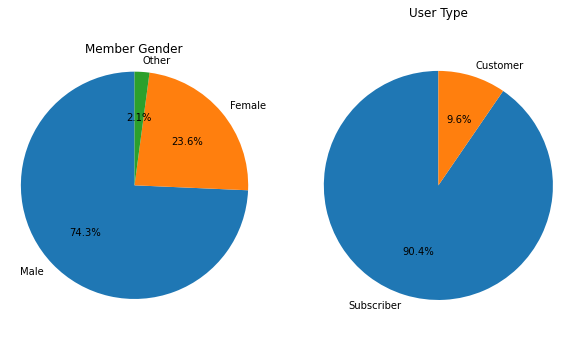

In [31]:
# Explore gender of members and user type

plt.figure(figsize = [10, 6])
plt.subplot(1,2,1)
sorted_gender = df['member_gender'].value_counts()
plt.pie(sorted_gender, labels = sorted_gender.index, startangle = 90, autopct = '%1.1f%%')
plt.title('Member Gender')
plt.axis('square')


plt.subplot(1,2,2)
sorted_type = df['user_type'].value_counts()
plt.pie(sorted_type, labels = sorted_type.index, startangle = 90, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('User Type');

From the plot above we can conclude that: 

- Males represent 75% of the dataset which is almost 3 times the female bikers
- More than 90% of users are Subscribers to the ford bike service

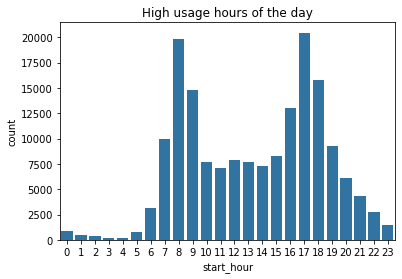

In [32]:
# Exploring the start time hour 
color = sns.color_palette()[0]
sns.countplot(data = df, x = 'start_hour', color = color)
plt.title("High usage hours of the day");

We can see that the peak hours with the most bikers are 8 AM and 5 PM which indicates that most people use the ford bike service to go to work and return home

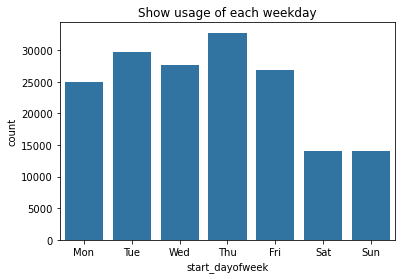

In [33]:
# Exploring the start day of week 
sns.countplot(data = df, x = 'start_dayofweek', color = color)
plt.title("Show usage of each weekday");

Obviously Thursday has the most bikers of the week and overall we can see that weekdays have more bikers than weekends

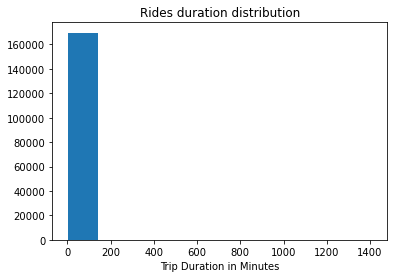

In [34]:
# Exploring the duration of the ride 
plt.hist(data = df, x = 'duration_min')
plt.title("Rides duration distribution")
plt.xlabel('Trip Duration in Minutes');

The plot above is not clear enough as we can see that all of the rides are congesting under 200 minutes duration so we have to zoom in to explore the distribution

In [35]:
df['duration_min'].describe()

count    169992.000000
mean         11.717717
std          27.676933
min           1.016667
25%           5.383333
50%           8.483333
75%          13.100000
max        1409.133333
Name: duration_min, dtype: float64

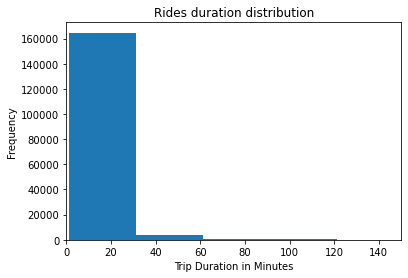

In [36]:
bins = np.arange(df['duration_min'].min(), df['duration_min'].max()+ 30, 30)
plt.hist(df['duration_min'], bins = bins)
plt.title("Rides duration distribution")
plt.xlabel ('Trip Duration in Minutes')
plt.ylabel('Frequency')
plt.xlim((0,150));

The statistics analysis shows that 75% of the rides are under 15 minutes duration and the plot shows that most of the rides are under 30 minutes duration. There is also a pretty long tail that indicates that some users keep their bike rented during the working hours or maybe forgetting to log off after finishing their rides. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The number of trips peaked around 8 am and 5 pm during a day, there were more trips on work days (Mon-Fri) compared to weekends. 

User-wise, there are male riders more than female, and most members are subscribers compared to casual riders. Also most riders are around 25 to 40 years old. 

Most rides are short and lasts up to 30 minutes, though there were some very long outliers like 24 hour rides.

I didn't need to perform any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of the trip duration was a little surprising at the beginning when plotting the original data. Using the describe() method and xticks() to zoom in to a smaller range where most trip records fell, which made the distribution much clearer. That helps to clear the big picture regarding the duration of the rides. 

## Bivairate Exploration

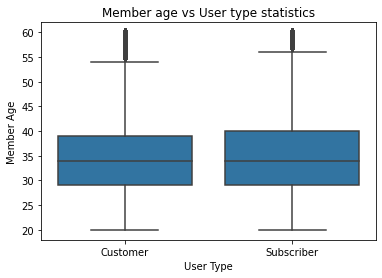

In [37]:
# Exploring member age vs user type 

sns.boxplot(data = df, x = 'user_type', y = 'member_age', color = color)
plt.title("Member age vs User type statistics")
plt.xlabel('User Type')
plt.ylabel('Member Age');

subscribers who ride are slightly older than customers, with a wider range of ages as well. 

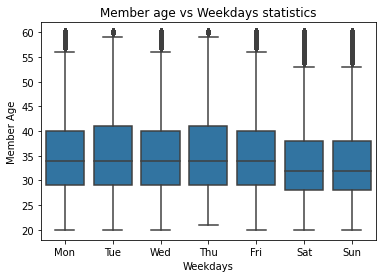

In [38]:
# Exploring member age vs weekdays

sns.boxplot(data = df, x = 'start_dayofweek', y = 'member_age', color = color)
plt.title("Member age vs Weekdays statistics")
plt.xlabel('Weekdays')
plt.ylabel('Member Age');

We can see clearly that bikers in the weekdays are slightly older than bikers in the weekends which again confirm what we concluded in the univariate analysis that most bikers use the service to go to work and return home.

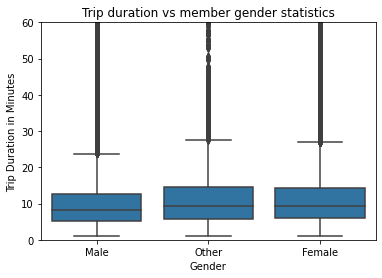

In [39]:
# Exploring trip duration vs member gender 

sns.boxplot(data = df, x = 'member_gender', y = 'duration_min', color = color)
plt.title("Trip duration vs member gender statistics")
plt.ylim(0, 60)
plt.xlabel('Gender')
plt.ylabel('Trip Duration in Minutes');

Male bikers tend to have shorter trips compared to female and other users.

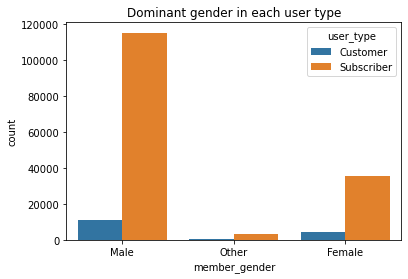

In [40]:
# Exploring member gender vs user types 

sns.countplot(data = df, x = 'member_gender', hue = 'user_type')
plt.title("Dominant gender in each user type");

This plot shows that male bikers number is more than females and other whether subscribers or casual users.

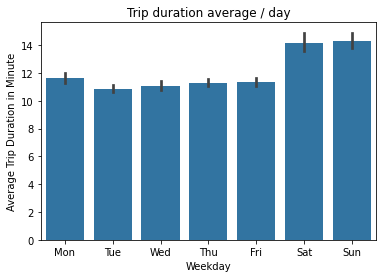

In [41]:
# Exploring trip duration vs weekdays

sns.barplot(data = df, x = 'start_dayofweek', y = 'duration_min', color = color)
plt.title("Trip duration average / day")
plt.xlabel('Weekday')
plt.ylabel('Average Trip Duration in Minute');

The riding trips are shorter on weekdays compared to weekends. It indicates the usage of the service on normal work days, while more casual flexible use on weekends. 

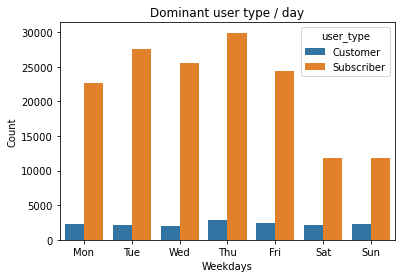

In [42]:
# Exploring weekdays vs user type 

sns.countplot(data = df, x = 'start_dayofweek', hue = 'user_type')
plt.title("Dominant user type / day")
plt.xlabel('Weekdays')
plt.ylabel('Count');

We can see clearly that subscribers are using the service more in the weekdays compared to the weekends while we can see that there is almost no big change in the behaviour of casual users during weekdays and weekends.  

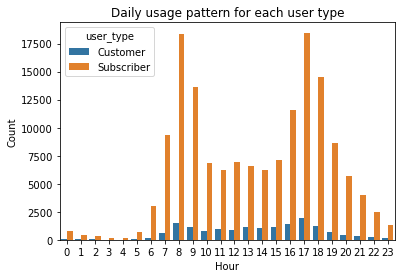

In [43]:
# Exploring daily usage vs user type 

sns.countplot(data = df, x = 'start_hour', hue = 'user_type')
plt.title("Daily usage pattern for each user type")
plt.xlabel('Hour')
plt.ylabel('Count');

Also here we can see that both subscribers and casual users are using the service almost in the same peak hours at 8 Am and 5 Pm which refers to starting and ending working hours everyday. 

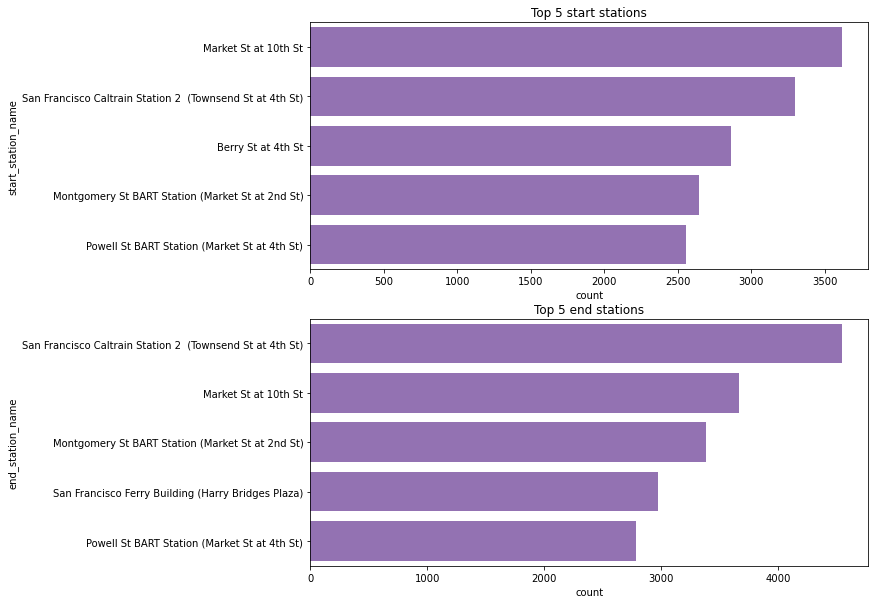

In [44]:
# Exploring Top 5 start stations vs Top 5 end stations
color = sns.color_palette()[4]
plt.figure(figsize = [10, 10])
plt.subplot(2,1,1)
start_order = df['start_station_name'].value_counts()[:5]
df_start = df.loc[df['start_station_name'].isin(start_order.index)]
sns.countplot(data = df, y = 'start_station_name', order = start_order.index, color = color)
plt.title("Top 5 start stations")

plt.subplot(2,1,2)
end_order = df['end_station_name'].value_counts()[:5]
df_end = df.loc[df['end_station_name'].isin(end_order.index)]
sns.countplot(data = df, y = 'end_station_name', order = end_order.index, color = color)
plt.title("Top 5 end stations");

Both (Market st, San Francisco caltrain station2) are the highest starting and end destinations.
We can use this data to increase number of available bikes at these stations to avoid running out of available bikes specially in the rush days and rush hours. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are a lot more subscriber usage than customers. The riding habit varies a lot between subscribers and customers. Subscribers use the service for work that's why most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and return home in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends. Subscriber users are slightly older than customer users who tend to take longer rides.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We can see that subscribers are slightly older than customers on average but take much shorter rides.

## Multivariate Exploration

How does the average trip duration vary in weekdays between customers and subscribers?

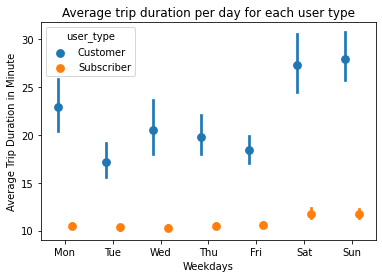

In [45]:
sns.pointplot(data = df, x = 'start_dayofweek', y = 'duration_min', hue = 'user_type', dodge = 0.3, linestyles = "")
plt.title("Average trip duration per day for each user type")
plt.xlabel('Weekdays')
plt.ylabel('Average Trip Duration in Minute');

It can be seen from the above plot that subscribers ride much shorter trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends.    

What is the hourly usage pattern during weekdays for customers and subscribers?

<Figure size 432x288 with 0 Axes>

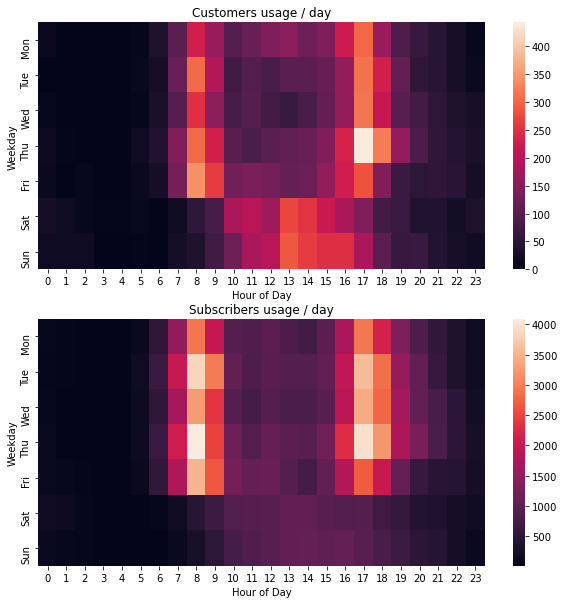

In [46]:
plt.suptitle('Hourly Usage for Customers and Subscribers a long the week')

plt.figure(figsize=[10, 10])
plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
counts = customers.groupby(['start_dayofweek', 'start_hour']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index='start_dayofweek', columns='start_hour', values='count')
sns.heatmap(counts)
plt.title('Customers usage / day')
plt.xticks(rotation=0)
plt.xlabel('Hour of Day')
plt.ylabel('Weekday');

plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
counts = subscribers.groupby(['start_dayofweek', 'start_hour']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index='start_dayofweek', columns='start_hour', values='count')
sns.heatmap(counts)
plt.title('Subscribers usage / day')
plt.xticks(rotation=0)
plt.xlabel('Hour of Day')
plt.ylabel('Weekday');

The heatmaps shows clearly very different usage pattern between the two type of riders. Subscribers use the system heavily on work days Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9 am and 5-6 pm on work days for subscribers when used for work , on the other hand customers tend to use more in the late afternoon around 5 pm Monday to Friday.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.        

### Were there any interesting or surprising interactions between features?

The interactions between features make sense when looked at combined. The usage habit difference between male and female is not that much or obvious throughout the exploration, which could be related to the imbalanced number of female bikers compared to males. It'd be interesting to see how male and female use the system differently if there were more female data.   